# <span style="color:black;">Importation des bibliothèques nécessaires</span>


In [1]:
import pandas as pd
import time
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## <span style="color:black;">Chargement des datasets</span>


In [2]:
df_train = pd.read_csv('C:/Users/PC/Desktop/2/pfa/Datasets/Credit Card Transactions Fraud Detection Dataset/fraudTrain.csv')
df_test = pd.read_csv('C:/Users/PC/Desktop/2/pfa/Datasets/Credit Card Transactions Fraud Detection Dataset/fraudTest.csv')

In [3]:
df_test.shape

(555719, 23)

In [4]:
df_train.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


## <span style="color:black;">Affichage des colonnes du dataset d'entraînement</span>


In [5]:
df_train.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

## <span style="color:black;">Dimensions du dataset d'entraînement</span>


In [6]:
df_train.shape

(1296675, 23)

## <span style="color:black;">Informations générales sur le dataset d'entraînement</span>


In [9]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

# <span style="color:black;">EDA</span>


## <span style="color:black;">Statistiques descriptives du dataset d'entraînement</span>


In [21]:
df_train.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06
mean,6.483370e+05,4.171920e+17,7.035104e+01,4.880067e+04,3.853762e+01,-9.022634e+01,8.882444e+04,1.349244e+09,3.853734e+01,-9.022646e+01,5.788652e-03
std,3.743180e+05,1.308806e+18,1.603160e+02,2.689322e+04,5.075808e+00,1.375908e+01,3.019564e+05,1.284128e+07,5.109788e+00,1.377109e+01,7.586269e-02
min,0.000000e+00,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00
25%,3.241685e+05,1.800429e+14,9.650000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,1.338751e+09,3.473357e+01,-9.689728e+01,0.000000e+00
50%,6.483370e+05,3.521417e+15,4.752000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,1.349250e+09,3.936568e+01,-8.743839e+01,0.000000e+00
75%,9.725055e+05,4.642255e+15,8.314000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.359385e+09,4.195716e+01,-8.023680e+01,0.000000e+00
max,1.296674e+06,4.992346e+18,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.371817e+09,6.751027e+01,-6.695090e+01,1.000000e+00


## <span style="color:black;">Détection des valeurs manquantes dans le dataset d'entraînement</span>


In [11]:
df_train.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

## <span style="color:black;">Nombre de valeurs uniques par colonne dans le dataset d'entraînement</span>


In [13]:
df_train.nunique()

Unnamed: 0               1296675
trans_date_trans_time    1274791
cc_num                       983
merchant                     693
category                      14
amt                        52928
first                        352
last                         481
gender                         2
street                       983
city                         894
state                         51
zip                          970
lat                          968
long                         969
city_pop                     879
job                          494
dob                          968
trans_num                1296675
unix_time                1274823
merch_lat                1247805
merch_long               1275745
is_fraud                       2
dtype: int64

## Analyse univarie & bivaraie de données Catégoriale

## <span style="color:black;">Conversion de la colonne 'trans_date_trans_time' en format datetime</span>


In [3]:
df_train["trans_date_trans_time"] = pd.to_datetime(df_train["trans_date_trans_time"])

### Analyse univarie [X]

#### Analyse des variables numériques

##### <span style="color:black;">Visualisation des occurrences par catégorie sous forme de diagramme à barres</span>


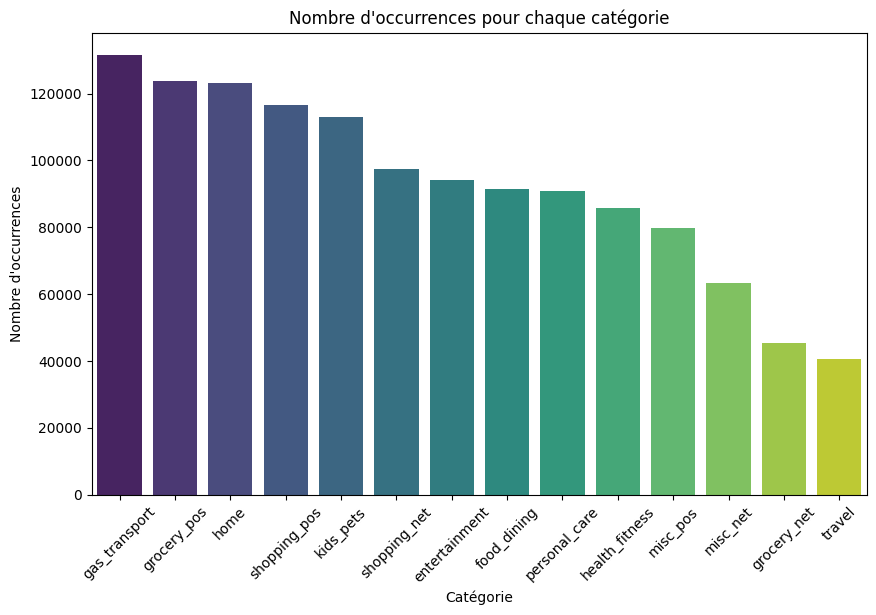

In [20]:
# Compter les occurrences de chaque catégorie
category_counts = df_train['category'].value_counts().reset_index()
category_counts.columns = ['category', 'count']

# Tracer le diagramme à barres avec des couleurs uniques pour chaque barre
plt.figure(figsize=(10, 6))
sns.barplot(x='category', y='count', hue='category', data=category_counts, palette='viridis', dodge=False, legend=False)
plt.title('Nombre d\'occurrences pour chaque catégorie')
plt.xlabel('Catégorie')
plt.ylabel('Nombre d\'occurrences')
plt.xticks(rotation=45)
plt.show()

##### <span style="color:black;">Visualisation des distributions des variables numériques à l'aide d'histogrammes</span>


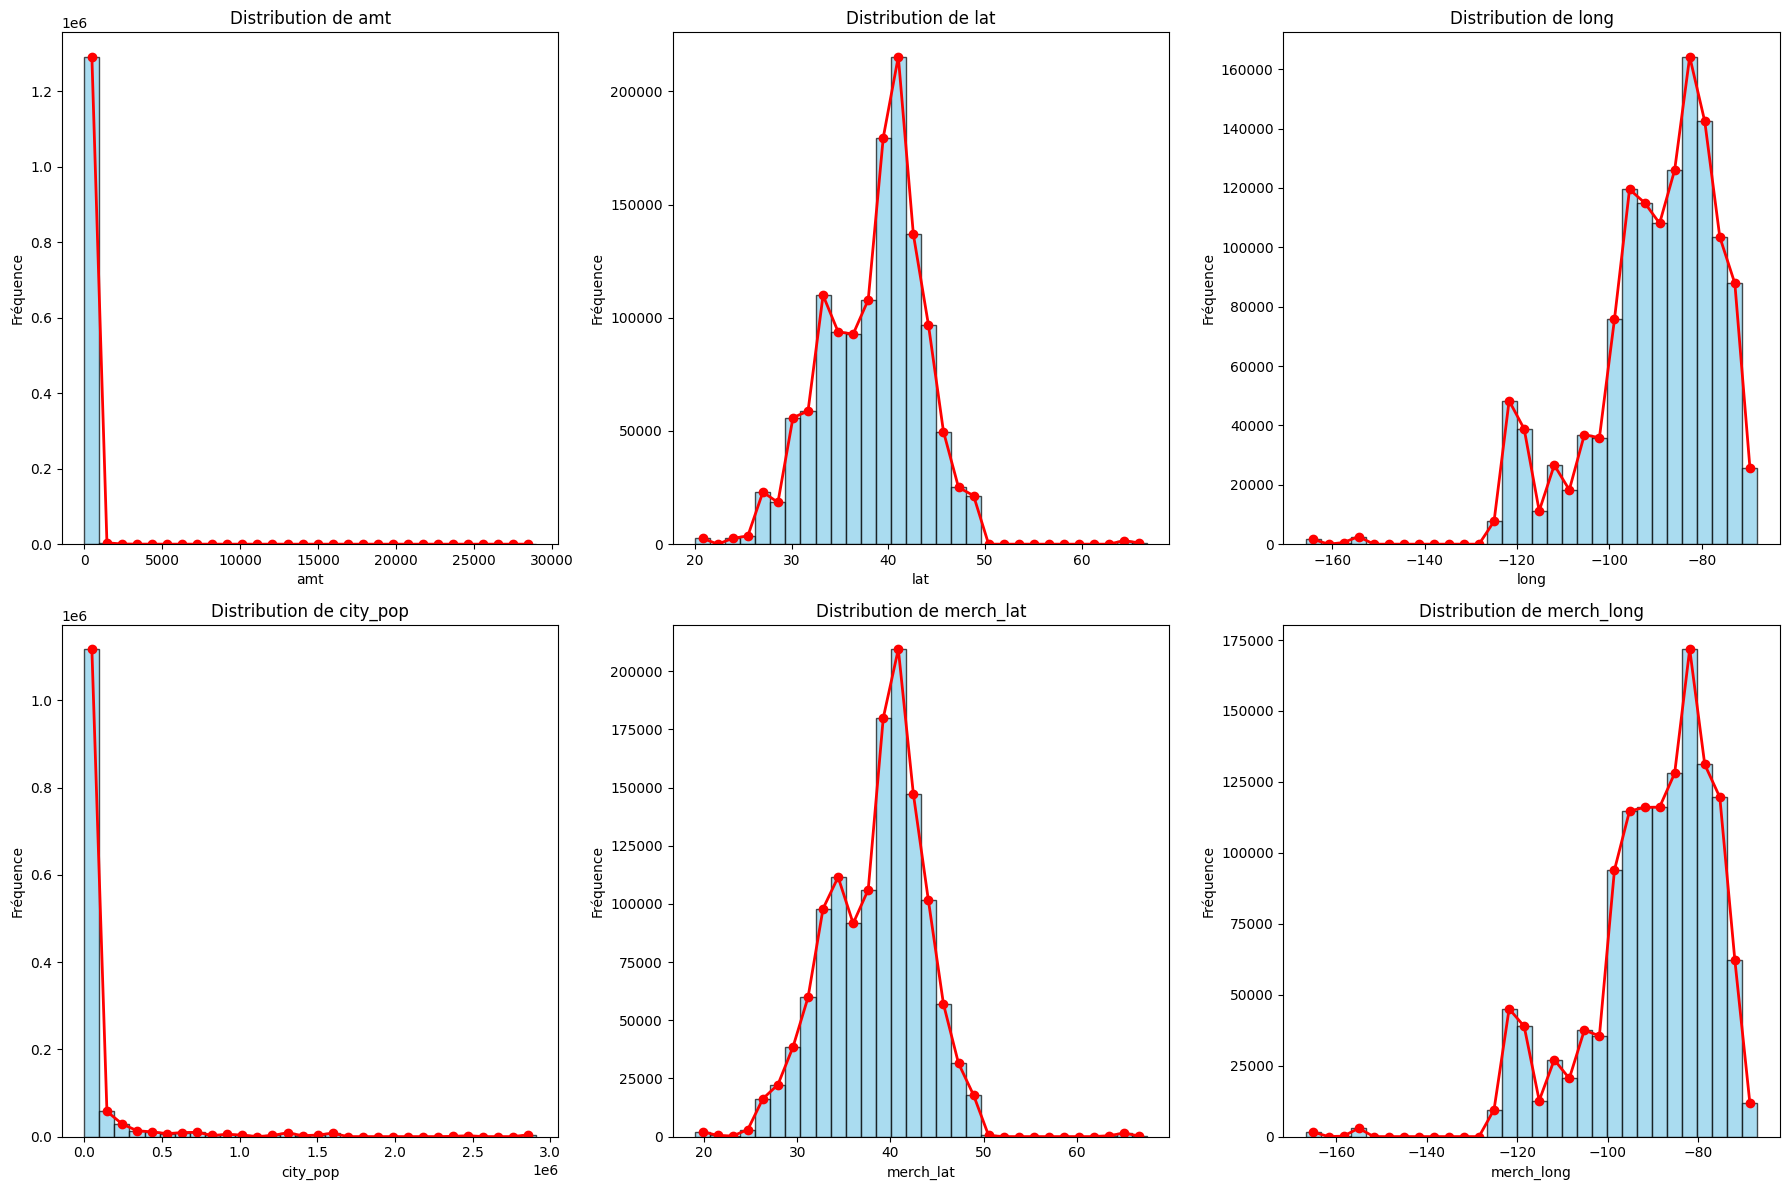

In [24]:
import matplotlib.pyplot as plt
import numpy as np

# Variables numériques
numerical_columns = ['amt', 'lat', 'long', 'city_pop', 'merch_lat', 'merch_long']

# Créer une grille de sous-graphes (2 lignes, 3 colonnes)
fig, axes = plt.subplots(2, 3, figsize=(18, 12))  # 2 lignes et 3 colonnes

# Parcourir les colonnes numériques et tracer les graphiques
for i, col in enumerate(numerical_columns):
    row = i // 3  # Indice de ligne
    col_idx = i % 3  # Indice de colonne
    
    # Tracer l'histogramme
    n, bins, patches = axes[row, col_idx].hist(df_train[col], bins=30, color='skyblue', edgecolor='black', alpha=0.7)
    
    # Ajouter la courbe
    bin_centers = 0.5 * (bins[1:] + bins[:-1])  # Calculer les centres des barres
    axes[row, col_idx].plot(bin_centers, n, color='red', linestyle='-', marker='o', linewidth=2)
    
    # Ajouter les titres et labels
    axes[row, col_idx].set_title(f'Distribution de {col}')
    axes[row, col_idx].set_xlabel(col)
    axes[row, col_idx].set_ylabel('Fréquence')

# Ajuster les espaces entre les sous-graphes
plt.tight_layout()
plt.show()


##### <span style="color:black;">Analyse des distributions des variables numériques avec des boxplots</span>


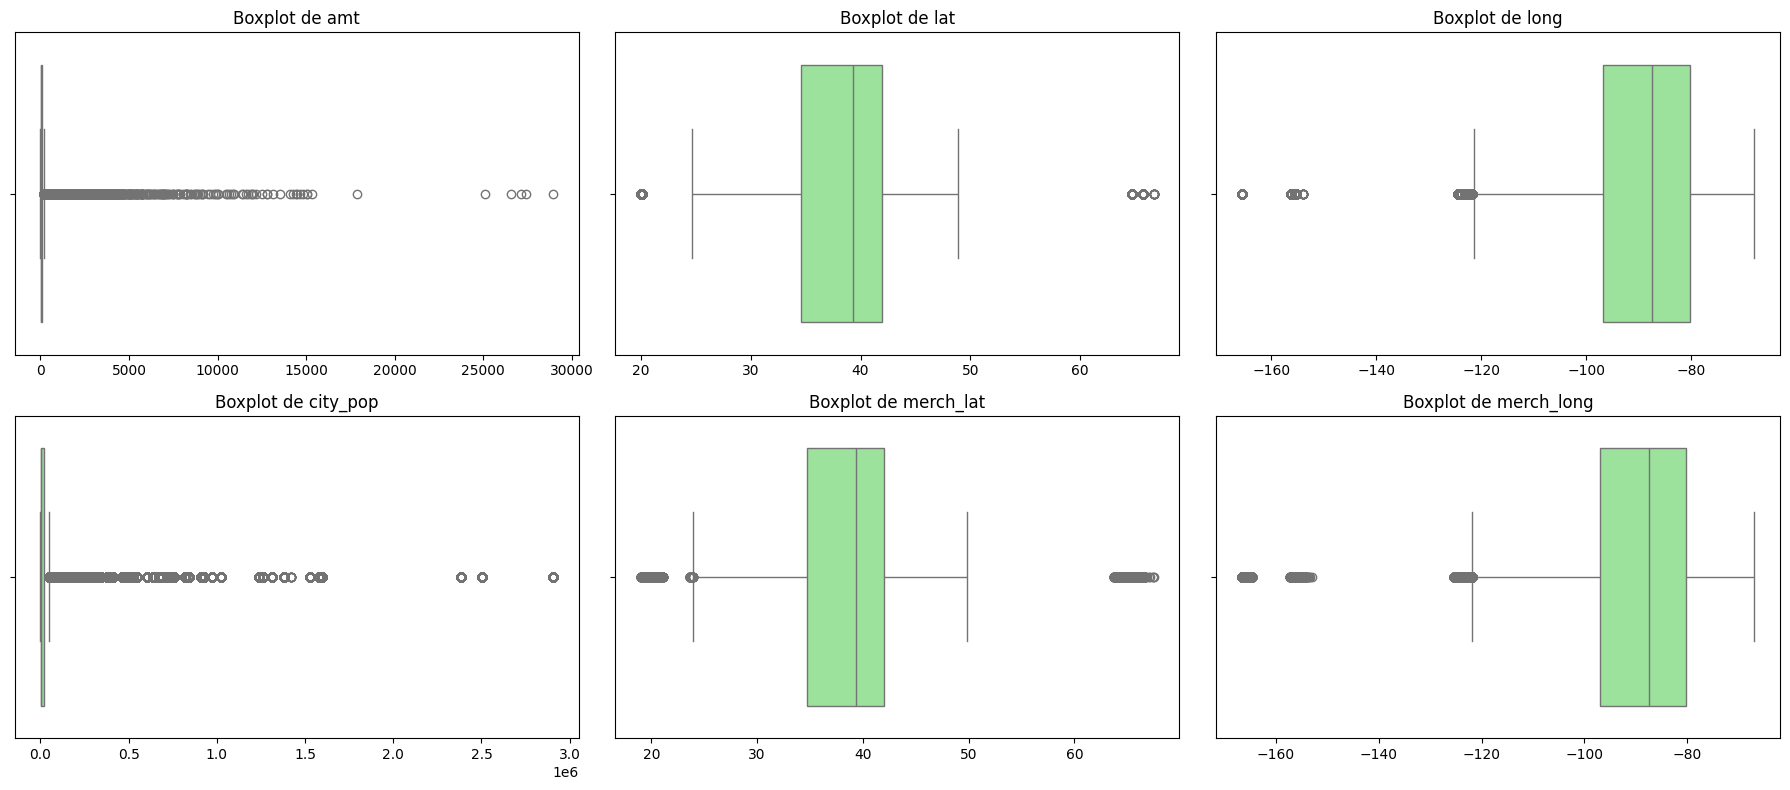

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Variables numériques
numerical_columns = ['amt', 'lat', 'long', 'city_pop', 'merch_lat', 'merch_long']

# Créer une grille de sous-graphes (2 lignes, 3 colonnes)
fig, axes = plt.subplots(2, 3, figsize=(18, 8), sharey=True)

# Tracer les boxplots
for i, col in enumerate(numerical_columns):
    row = i // 3  # Indice de ligne
    col_idx = i % 3  # Indice de colonne
    sns.boxplot(x=df_train[col], color='lightgreen', ax=axes[row, col_idx])
    axes[row, col_idx].set_title(f'Boxplot de {col}')
    axes[row, col_idx].set_xlabel('')
    axes[row, col_idx].set_ylabel('')

# Ajuster les espaces entre les sous-graphes
plt.tight_layout()
plt.show()


##### <span style="color:black;">Analyse des valeurs catégorielles dans le dataset d'entraînement</span>


In [30]:
categorical_columns = ['category', 'merchant', 'state', 'gender']

for col in categorical_columns:
    print(f"\nValeurs pour {col}:")
    print(df_train[col].value_counts())


Valeurs pour category:
category
gas_transport     131659
grocery_pos       123638
home              123115
shopping_pos      116672
kids_pets         113035
shopping_net       97543
entertainment      94014
food_dining        91461
personal_care      90758
health_fitness     85879
misc_pos           79655
misc_net           63287
grocery_net        45452
travel             40507
Name: count, dtype: int64

Valeurs pour merchant:
merchant
fraud_Kilback LLC                       4403
fraud_Cormier LLC                       3649
fraud_Schumm PLC                        3634
fraud_Kuhn LLC                          3510
fraud_Boyer PLC                         3493
                                        ... 
fraud_Douglas, DuBuque and McKenzie      775
fraud_Treutel-King                       775
fraud_Medhurst, Labadie and Gottlieb     759
fraud_Reichert-Weissnat                  753
fraud_Hahn, Douglas and Schowalter       727
Name: count, Length: 693, dtype: int64

Valeurs pour state:
sta

##### <span style="color:black;">Visualisation des occurrences des variables catégorielles avec des diagrammes à barres</span>


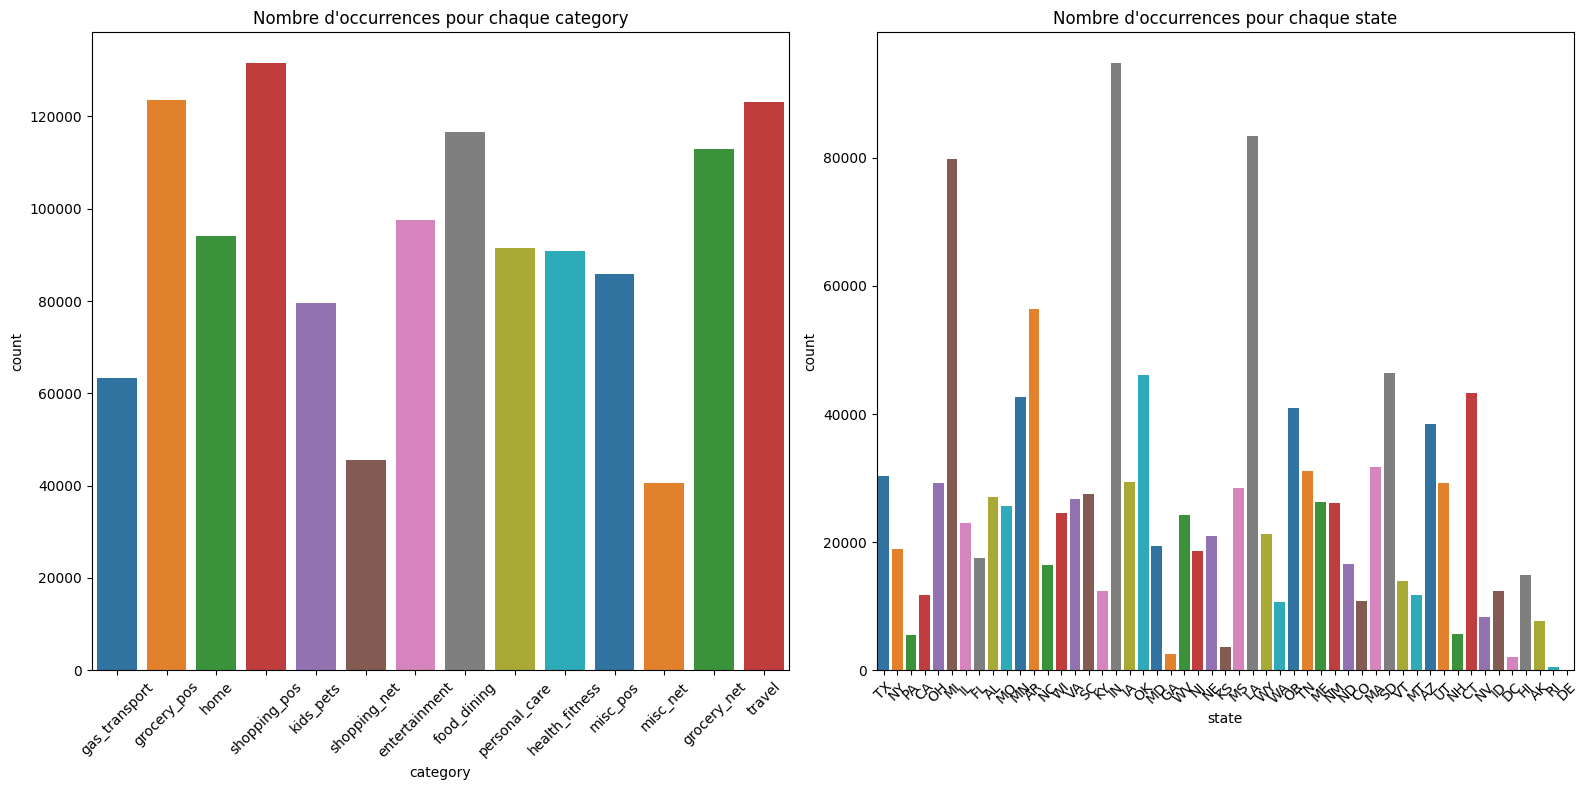

In [38]:
# Colonnes catégorielles
categorical_columns = ['category', 'state']

# Créer une grille de sous-graphes (1 ligne, 2 colonnes)
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Tracer les diagrammes à barres
for i, col in enumerate(categorical_columns):
    unique_values = df_train[col].value_counts().index
    palette = sns.color_palette("tab10", len(unique_values))  # Couleurs uniques pour chaque catégorie
    sns.countplot(x=col, data=df_train, hue=col, palette=palette, ax=axes[i])
    axes[i].set_title(f'Nombre d\'occurrences pour chaque {col}')
    
    # Ajuster les labels de l'axe des x
    axes[i].set_xticks(range(len(unique_values)))
    axes[i].set_xticklabels(unique_values, rotation=45)

# Ajuster les espaces entre les sous-graphes
plt.tight_layout()
plt.show()

##### <span style="color:black;">Distribution de la variable cible (frauduleux ou non)</span>


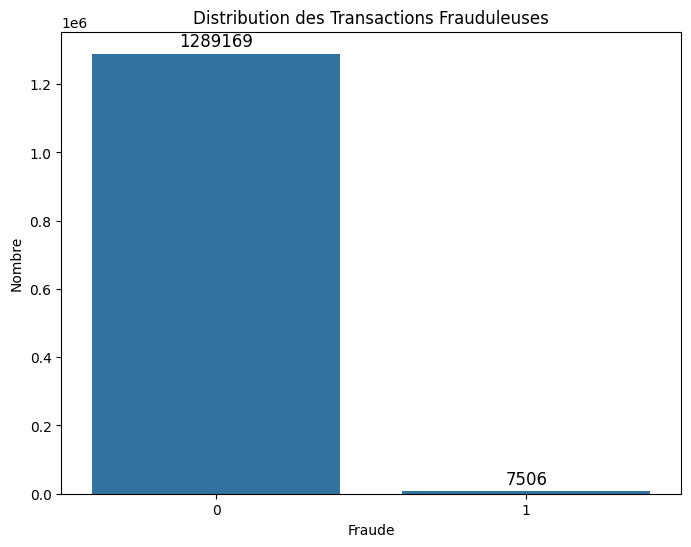

In [36]:
# Visualize the distribution of the target variable (fraudulent or not)
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='is_fraud', data=df_train)
plt.title('Distribution des Transactions Frauduleuses')
plt.xlabel('Fraude')
plt.ylabel('Nombre')

# Ajouter les annotations au-dessus de chaque barre
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5), 
                textcoords='offset points')

plt.show()

##### <span style="color:black;">Résumé statistique des dates et heures des transactions</span>


In [39]:
df_train['trans_date_trans_time'] = pd.to_datetime(df_train['trans_date_trans_time'])

# Résumé statistique des dates
print(df_train['trans_date_trans_time'].describe())

count                          1296675
mean     2019-10-03 12:47:28.070214144
min                2019-01-01 00:00:18
25%         2019-06-03 19:12:22.500000
50%                2019-10-03 07:35:47
75%         2020-01-28 15:02:55.500000
max                2020-06-21 12:13:37
Name: trans_date_trans_time, dtype: object


##### <span style="color:black;">Distribution des transactions dans le temps</span>


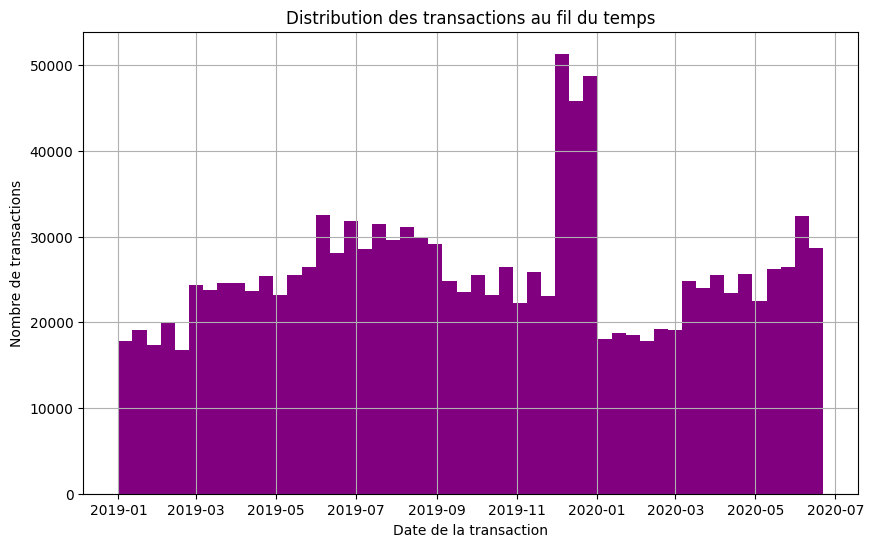

In [40]:
# Tracer l'histogramme des transactions dans le temps
plt.figure(figsize=(10, 6))
df_train['trans_date_trans_time'].hist(bins=50, color='purple')
plt.title('Distribution des transactions au fil du temps')
plt.xlabel('Date de la transaction')
plt.ylabel('Nombre de transactions')
plt.show()


#### Distribution des variables numériques avec des courbes de densité

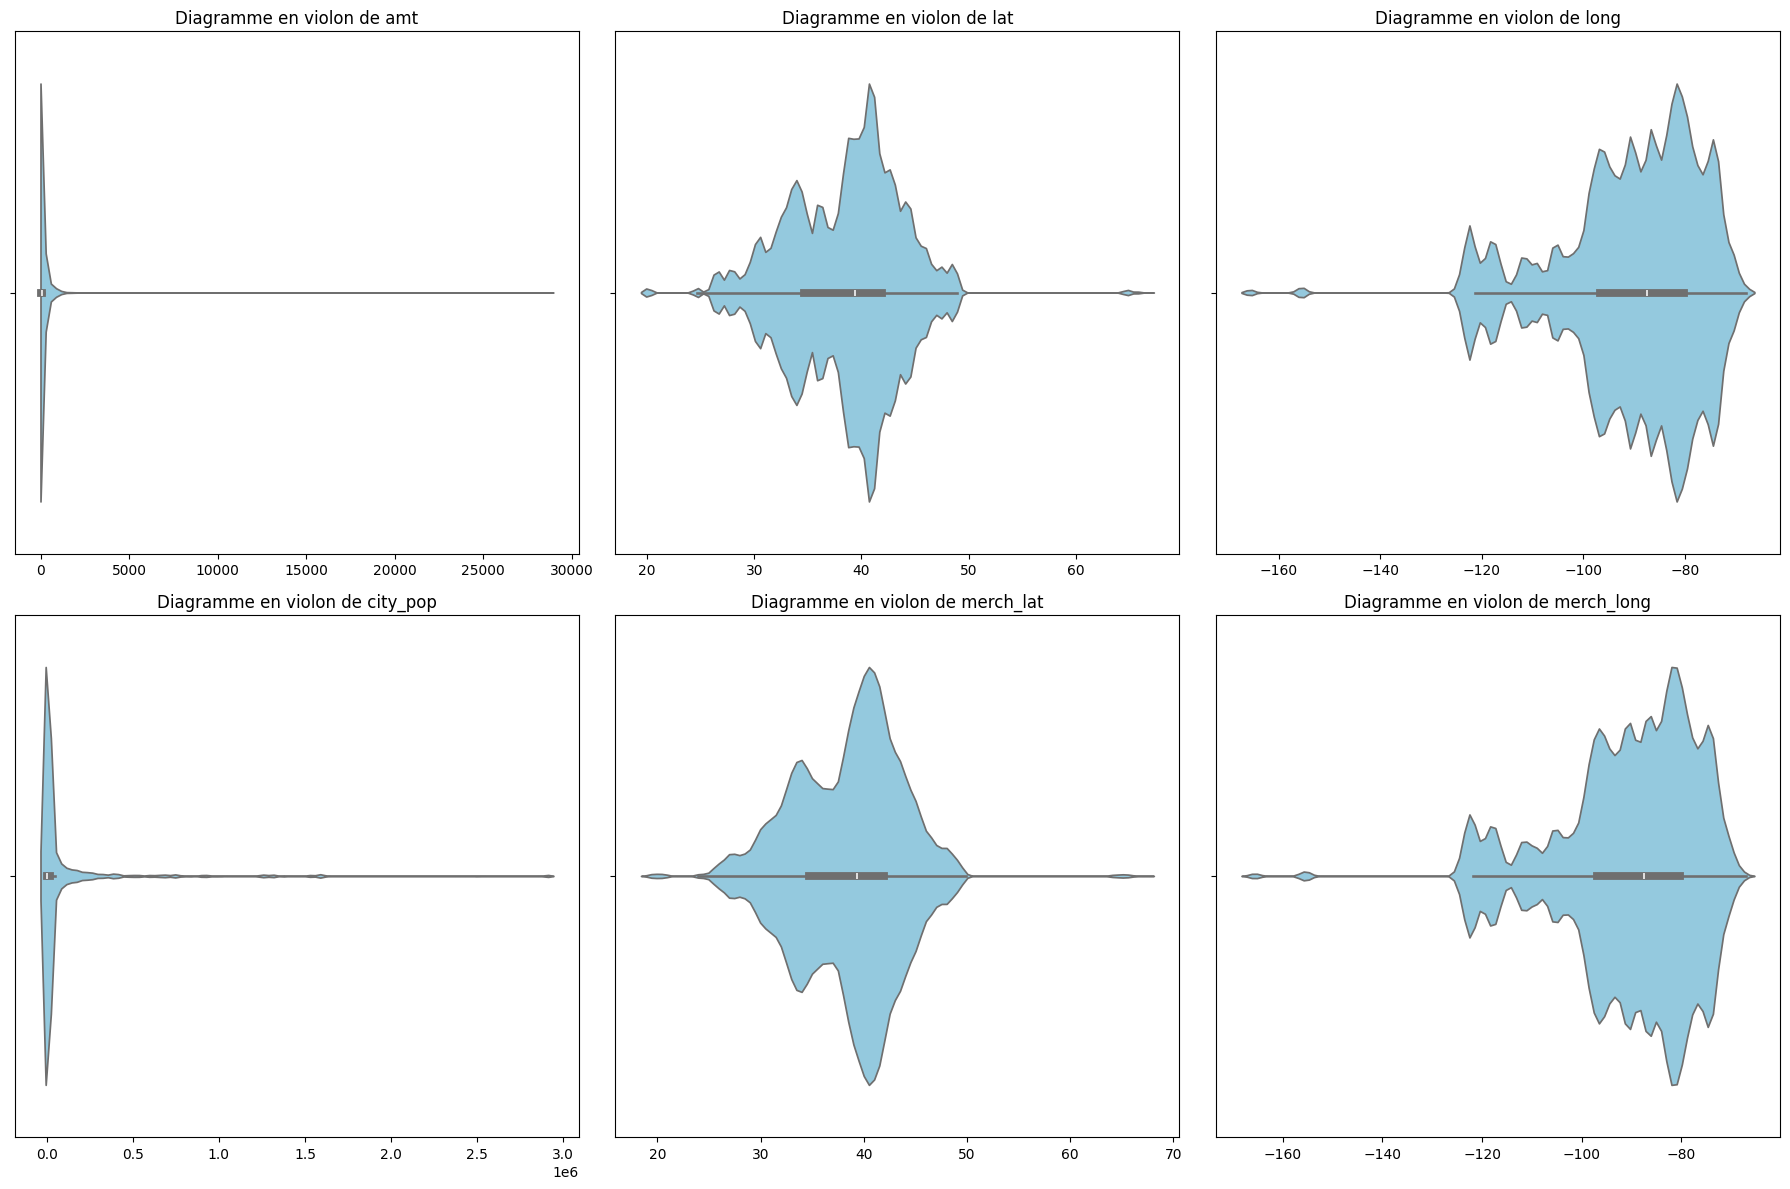

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

# Variables numériques
numerical_columns = ['amt', 'lat', 'long', 'city_pop', 'merch_lat', 'merch_long']

# Créer une grille de sous-graphes (2 lignes, 3 colonnes)
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Tracer les diagrammes en violon
for i, col in enumerate(numerical_columns):
    row = i // 3  # Indice de ligne
    col_idx = i % 3  # Indice de colonne
    sns.violinplot(x=df_train[col], color='skyblue', ax=axes[row, col_idx])
    axes[row, col_idx].set_title(f'Diagramme en violon de {col}')
    axes[row, col_idx].set_xlabel('')  # Enlever les labels des axes x si souhaité
    axes[row, col_idx].set_ylabel('')  # Enlever les labels des axes y si souhaité

# Ajuster les espaces entre les sous-graphes
plt.tight_layout()
plt.show()


#### Analyse des variables categorielles

##### <span style="color:black;">Taux de fraude par catégorie de transaction</span>


C:\Program Files\KMSpico\temp\ipykernel_8064\3914773525.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=fraud_rate_by_category.index, y=fraud_rate_by_category.values, palette='viridis')


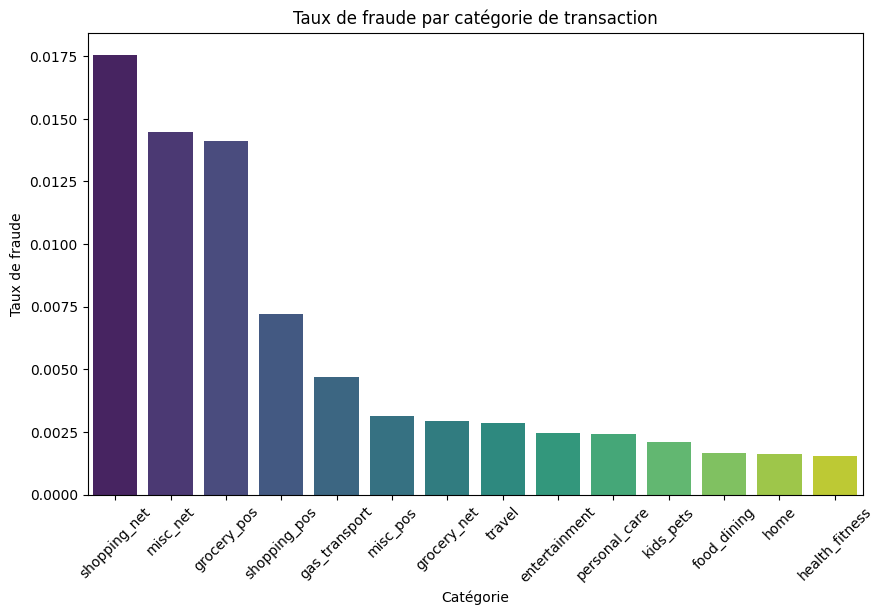

In [44]:
# Calculer le taux de fraude par catégorie
fraud_rate_by_category = df_train.groupby('category')['is_fraud'].mean().sort_values(ascending=False)

# Tracer le taux de fraude par catégorie
plt.figure(figsize=(10, 6))
sns.barplot(x=fraud_rate_by_category.index, y=fraud_rate_by_category.values, palette='viridis')
plt.title('Taux de fraude par catégorie de transaction')
plt.xlabel('Catégorie')
plt.ylabel('Taux de fraude')
plt.xticks(rotation=45)
plt.show()


##### <span style="color:black;">Taux de fraude par état</span>


C:\Program Files\KMSpico\temp\ipykernel_8064\1932013782.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=fraud_rate_by_state.index, y=fraud_rate_by_state.values, palette='viridis')


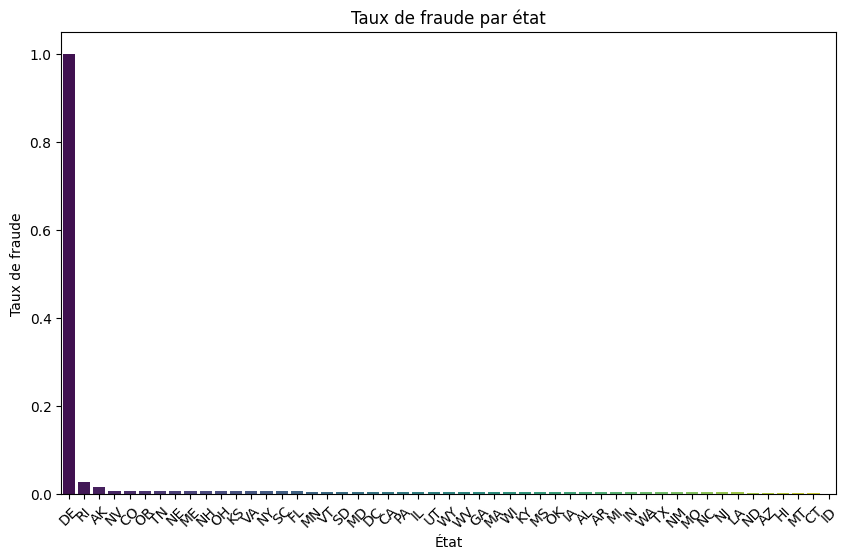

In [46]:
# Calculer le taux de fraude par état
fraud_rate_by_state = df_train.groupby('state')['is_fraud'].mean().sort_values(ascending=False)

# Tracer le taux de fraude par état
plt.figure(figsize=(10, 6))
sns.barplot(x=fraud_rate_by_state.index, y=fraud_rate_by_state.values, palette='viridis')
plt.title('Taux de fraude par état')
plt.xlabel('État')
plt.ylabel('Taux de fraude')
plt.xticks(rotation=45)
plt.show()

##### <span style="color:black;">Distribution des occurrences pour les variables catégorielles</span>


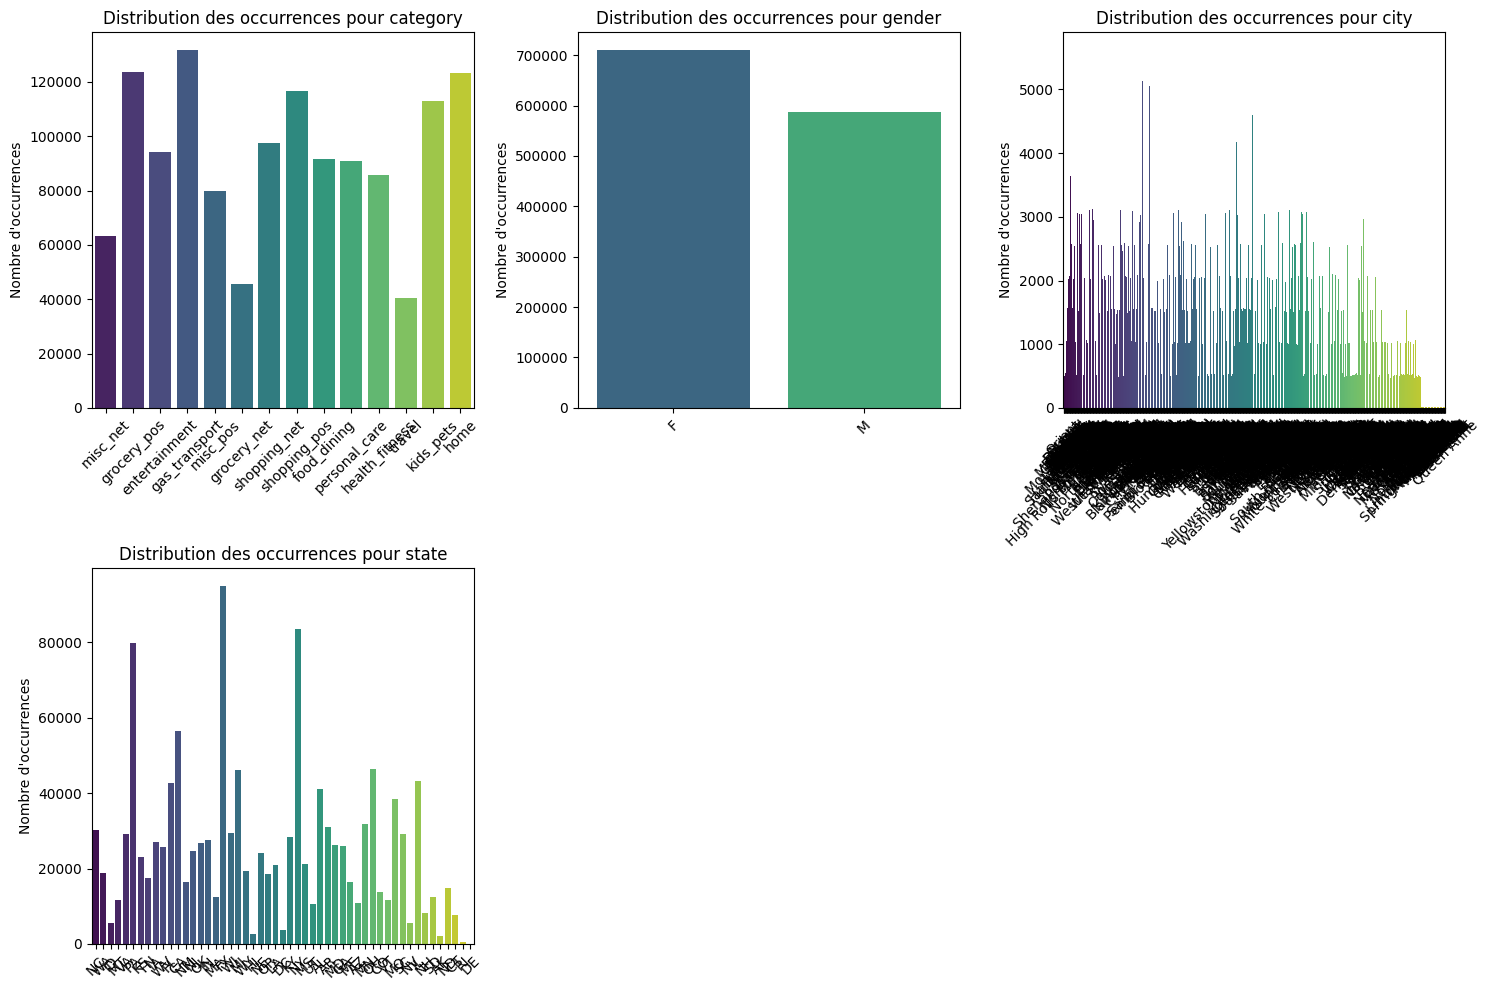

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

# Variables catégorielles
categorical_columns = ['category', 'gender', 'city', 'state']

# Déterminer le nombre de lignes nécessaires
n_columns = 3
n_rows = (len(categorical_columns) + n_columns - 1) // n_columns  # Calculer le nombre de lignes

# Créer une grille de sous-graphes (n_rows lignes, n_columns colonnes)
fig, axes = plt.subplots(n_rows, n_columns, figsize=(15, 5 * n_rows), squeeze=False)

# Tracer les diagrammes à barres pour chaque variable catégorielle
for i, col in enumerate(categorical_columns):
    row = i // n_columns  # Indice de ligne
    col_idx = i % n_columns  # Indice de colonne
    sns.countplot(x=col, data=df_train, hue=col, palette='viridis', ax=axes[row, col_idx])
    axes[row, col_idx].set_title(f'Distribution des occurrences pour {col}')
    axes[row, col_idx].set_xlabel('')
    axes[row, col_idx].set_ylabel('Nombre d\'occurrences')
    axes[row, col_idx].tick_params(axis='x', rotation=45)

# Enlever les sous-graphes vides si le nombre de colonnes n'est pas un multiple de 3
for j in range(len(categorical_columns), n_rows * n_columns):
    fig.delaxes(axes.flatten()[j])

# Ajuster les espaces entre les sous-graphes
plt.tight_layout()
plt.show()


#### <span style="color:black;">Analyse Bivariée : Relations entre les Variables</span>


##### <span style="color:black;">Visualisation du montant des transactions en fonction de la fraude</span>


C:\Program Files\KMSpico\temp\ipykernel_8064\809460391.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='is_fraud', y='amt', data=df_train, palette='coolwarm', ax=axes[0])


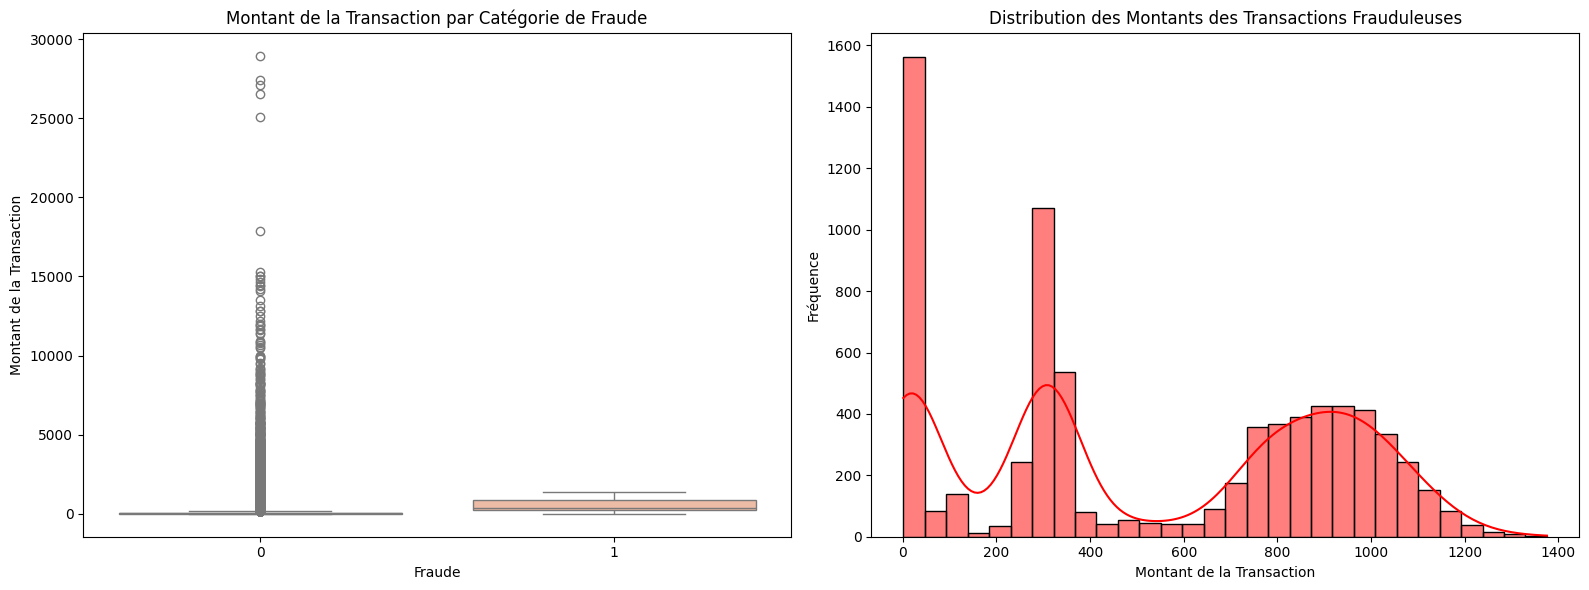

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

# Créer une grille de sous-graphes (1 ligne, 2 colonnes)
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Boxplot
sns.boxplot(x='is_fraud', y='amt', data=df_train, palette='coolwarm', ax=axes[0])
axes[0].set_title('Montant de la Transaction par Catégorie de Fraude')
axes[0].set_xlabel('Fraude')
axes[0].set_ylabel('Montant de la Transaction')

# Histogramme pour les transactions frauduleuses
sns.histplot(df_train[df_train['is_fraud'] == 1]['amt'], bins=30, color='red', kde=True, ax=axes[1])
axes[1].set_title('Distribution des Montants des Transactions Frauduleuses')
axes[1].set_xlabel('Montant de la Transaction')
axes[1].set_ylabel('Fréquence')

# Ajuster les espaces entre les sous-graphes
plt.tight_layout()
plt.show()


##### <span style="color:black;">Visualisation de la Population des Villes en Fonction de la Fraude</span>


C:\Program Files\KMSpico\temp\ipykernel_8064\2324931125.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='is_fraud', y='city_pop', data=df_train, palette='coolwarm')


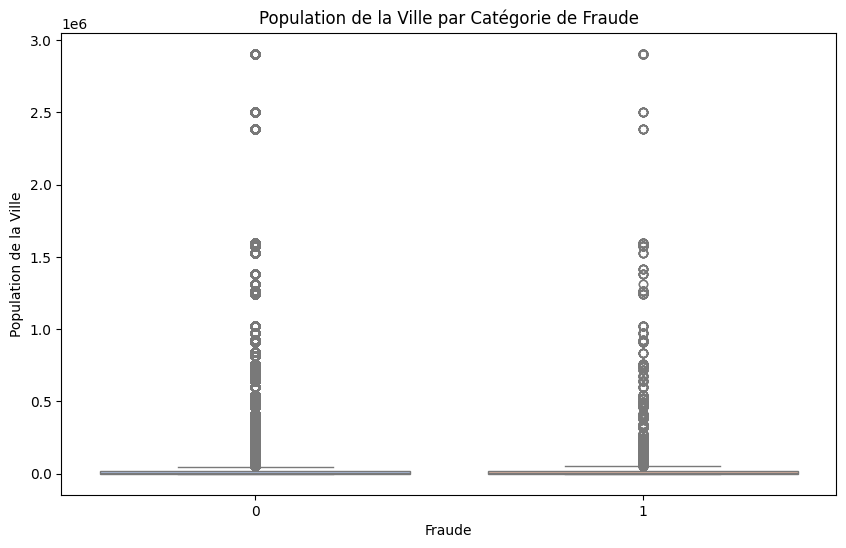

In [54]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='is_fraud', y='city_pop', data=df_train, palette='coolwarm')
plt.title('Population de la Ville par Catégorie de Fraude')
plt.xlabel('Fraude')
plt.ylabel('Population de la Ville')
plt.show()


##### <span style="color:black;">Nombre de Transactions par Catégorie de Marchand et Présence de Fraude</span>


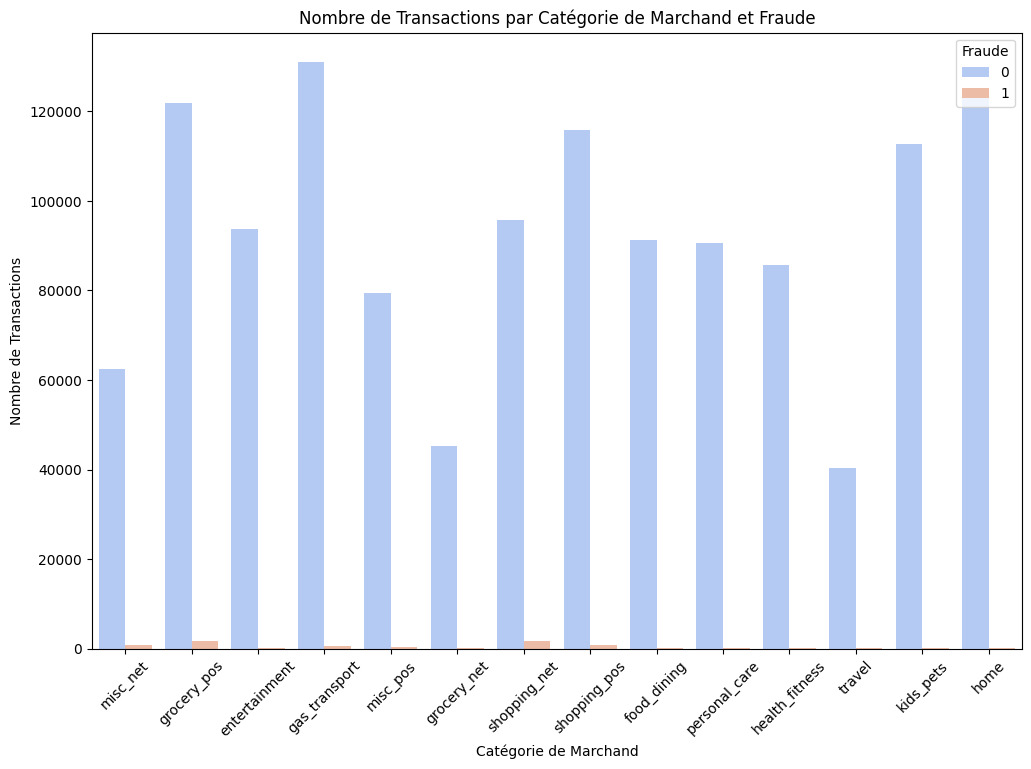

In [57]:
plt.figure(figsize=(12, 8))
sns.countplot(x='category', hue='is_fraud', data=df_train, palette='coolwarm')
plt.title('Nombre de Transactions par Catégorie de Marchand et Fraude')
plt.xlabel('Catégorie de Marchand')
plt.ylabel('Nombre de Transactions')
plt.xticks(rotation=45)
plt.legend(title='Fraude', loc='upper right')
plt.show()


##### <span style="color:black;">Analyse des Emplacements des Marchands et de la Latitude en Fonction de la Fraude</span>


C:\Program Files\KMSpico\temp\ipykernel_8064\3550663411.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='is_fraud', y='lat', data=df_train, palette='coolwarm')


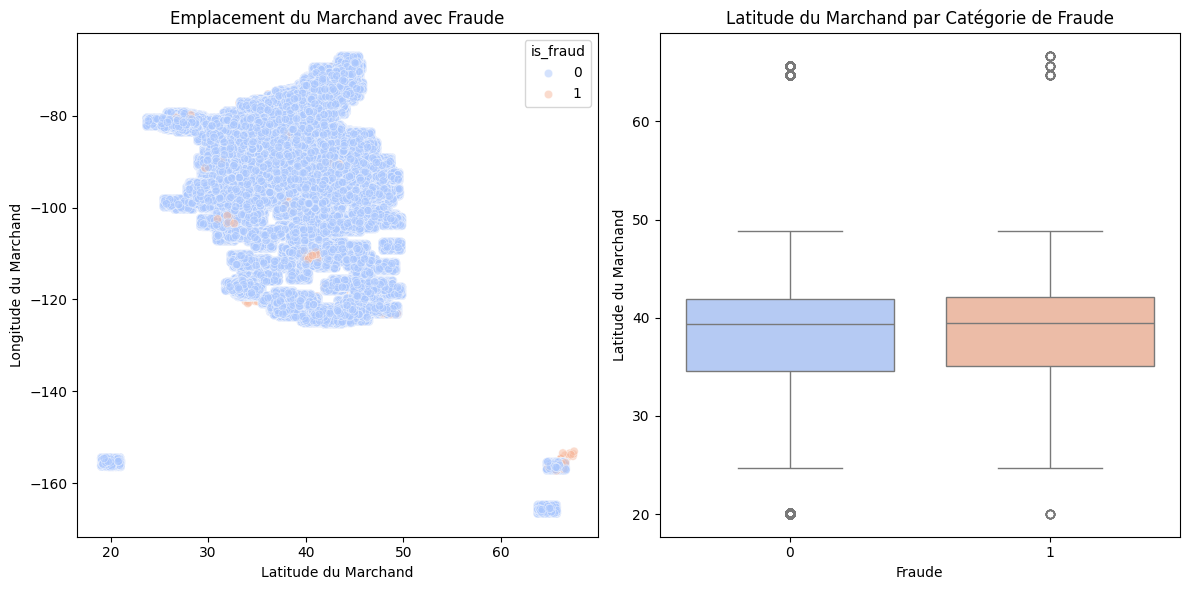

In [58]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(x='merch_lat', y='merch_long', hue='is_fraud', data=df_train, palette='coolwarm', alpha=0.5)
plt.title('Emplacement du Marchand avec Fraude')
plt.xlabel('Latitude du Marchand')
plt.ylabel('Longitude du Marchand')

plt.subplot(1, 2, 2)
sns.boxplot(x='is_fraud', y='lat', data=df_train, palette='coolwarm')
plt.title('Latitude du Marchand par Catégorie de Fraude')
plt.xlabel('Fraude')
plt.ylabel('Latitude du Marchand')

plt.tight_layout()
plt.show()


##### <span style="color:black;">Ajout de Variables Temporelles : Week-end, Période de la Journée, et Mois de la Transaction</span>


In [61]:
df_train["is_weekend"] = df_train["trans_date_trans_time"].dt.day_name().apply(lambda x : int((x == "Friday") | (x == "Sunday") | (x == "saturday")))

In [62]:
def day_period(x):
    if x >=0 and x < 6: return "Night"
    elif x>= 6 and x <= 12: return "Morning"
    elif x> 12 and x <= 15: return "Afternoon"
    elif x> 15 and x <= 20: return "Evening"
    elif x> 20 and x <= 24: return "Night"


df_train["day_period"] = df_train["trans_date_trans_time"].dt.hour.apply(day_period)

In [63]:
df_train["trans_month"] = df_train["trans_date_trans_time"].dt.month_name()

##### <span style="color:black;">Distribution des Transactions par Période de la Journée</span>


C:\Program Files\KMSpico\temp\ipykernel_8064\1693350291.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='day_period', data=df_train, palette='viridis')


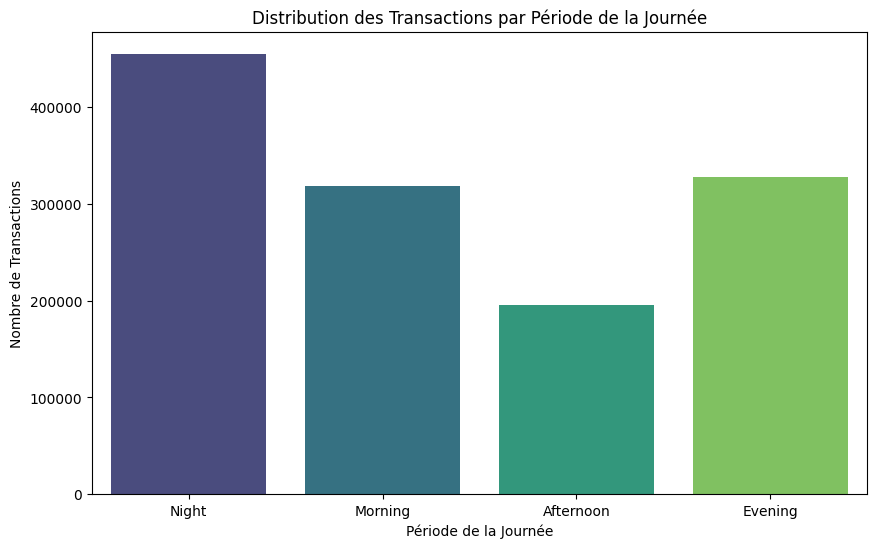

In [64]:
# Créer un graphique de comptage pour la colonne day_period
plt.figure(figsize=(10, 6))
sns.countplot(x='day_period', data=df_train, palette='viridis')
plt.title('Distribution des Transactions par Période de la Journée')
plt.xlabel('Période de la Journée')
plt.ylabel('Nombre de Transactions')
plt.show()

##### <span style="color:black;">Comparaison des Transactions Frauduleuses et Non-Frauduleuses par Période de la Journée</span>


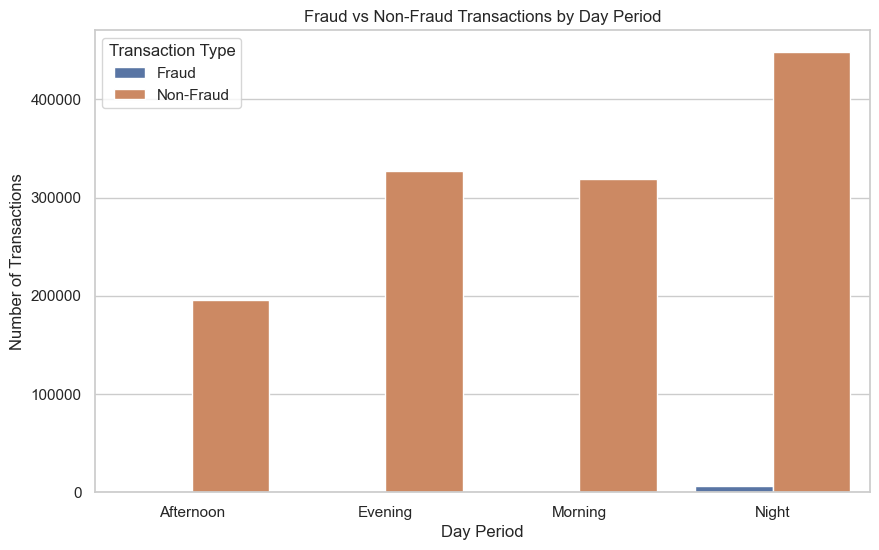

In [67]:
sns.set(style="whitegrid")

# 1. Compter les fraudes et non-fraudes par période de la journée
fraud_by_period = df_train[df_train['is_fraud'] == 1].groupby('day_period').size()
non_fraud_by_period = df_train[df_train['is_fraud'] == 0].groupby('day_period').size()

# Créer un DataFrame pour l'affichage
fraud_data_period = pd.DataFrame({
    'Fraud': fraud_by_period,
    'Non-Fraud': non_fraud_by_period
}).reset_index()

# Tracer les données
fraud_data_period_melted = fraud_data_period.melt(id_vars='day_period', value_vars=['Fraud', 'Non-Fraud'], 
                                                  var_name='Transaction Type', value_name='Count')

# Créer le plot
plt.figure(figsize=(10, 6))
sns.barplot(x='day_period', y='Count', hue='Transaction Type', data=fraud_data_period_melted)
plt.title('Fraud vs Non-Fraud Transactions by Day Period')
plt.xlabel('Day Period')
plt.ylabel('Number of Transactions')
plt.show()

##### <span style="color:black;">Comparaison des Transactions Frauduleuses et Non-Frauduleuses par Période de la Journée</span>


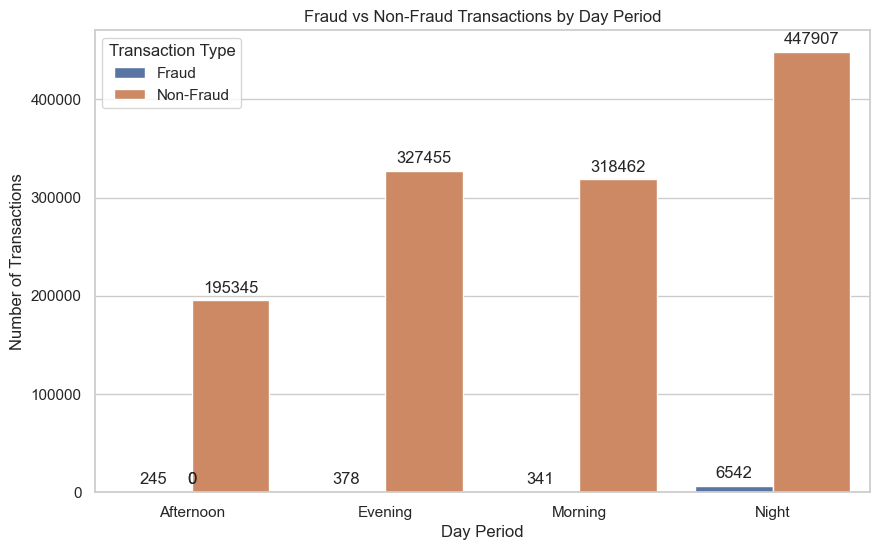

In [68]:
# Configurer Seaborn
sns.set(style="whitegrid")

# 1. Compter les fraudes et non-fraudes par période de la journée
fraud_by_period = df_train[df_train['is_fraud'] == 1].groupby('day_period').size()
non_fraud_by_period = df_train[df_train['is_fraud'] == 0].groupby('day_period').size()

# Créer un DataFrame pour l'affichage
fraud_data_period = pd.DataFrame({
    'Fraud': fraud_by_period,
    'Non-Fraud': non_fraud_by_period
}).reset_index()

# Tracer les données
fraud_data_period_melted = fraud_data_period.melt(id_vars='day_period', value_vars=['Fraud', 'Non-Fraud'], 
                                                  var_name='Transaction Type', value_name='Count')

# Créer le plot
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x='day_period', y='Count', hue='Transaction Type', data=fraud_data_period_melted)

# Ajouter les annotations au-dessus de chaque barre
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.0f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha = 'center', va = 'center', 
                     xytext = (0, 9), 
                     textcoords = 'offset points')

# Titre et étiquettes
plt.title('Fraud vs Non-Fraud Transactions by Day Period')
plt.xlabel('Day Period')
plt.ylabel('Number of Transactions')
plt.show()

In [65]:
df_train['month'] = df_train['trans_date_trans_time'].dt.month


##### <span style="color:black;">Transactions Totales par Mois  |  Transactions Frauduleuses vs Non-Frauduleuses par Mois</span>


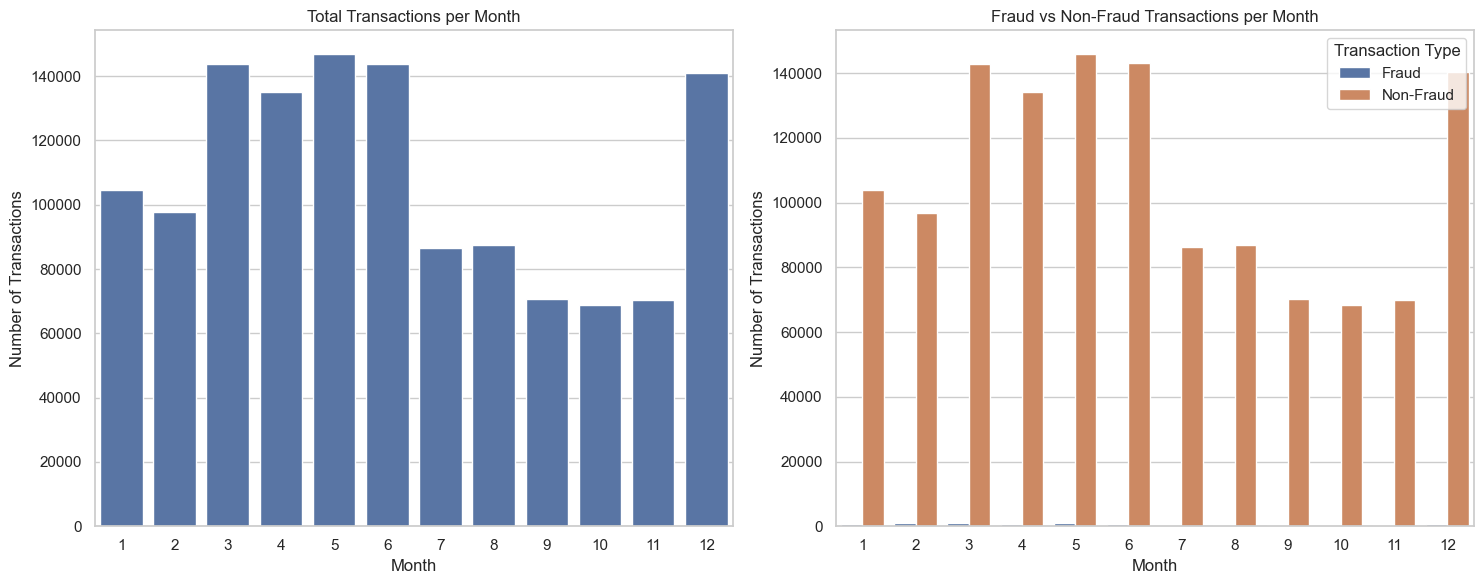

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configurer Seaborn
sns.set(style="whitegrid")

# Créer une figure avec deux sous-graphiques
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

# 1. Transactions totales par mois
total_transactions = df_train.groupby('month').size()

# Créer le plot
sns.barplot(x=total_transactions.index, y=total_transactions.values, ax=ax[0])
ax[0].set_title('Total Transactions per Month')
ax[0].set_xlabel('Month')
ax[0].set_ylabel('Number of Transactions')

# 2. Fraude et non-fraude par mois
fraud_transactions = df_train[df_train['is_fraud'] == 1].groupby('month').size()
non_fraud_transactions = df_train[df_train['is_fraud'] == 0].groupby('month').size()

# Créer un DataFrame pour l'affichage
fraud_data = pd.DataFrame({
    'Fraud': fraud_transactions,
    'Non-Fraud': non_fraud_transactions
}).reset_index()

# Tracer les données
fraud_data_melted = fraud_data.melt(id_vars='month', value_vars=['Fraud', 'Non-Fraud'], 
                                    var_name='Transaction Type', value_name='Count')
sns.barplot(x='month', y='Count', hue='Transaction Type', data=fraud_data_melted, ax=ax[1])
ax[1].set_title('Fraud vs Non-Fraud Transactions per Month')
ax[1].set_xlabel('Month')
ax[1].set_ylabel('Number of Transactions')

# Afficher les graphiques
plt.tight_layout()
plt.show()


##### <span style="color:black;">Nombre de Transactions Frauduleuses par Genre</span>


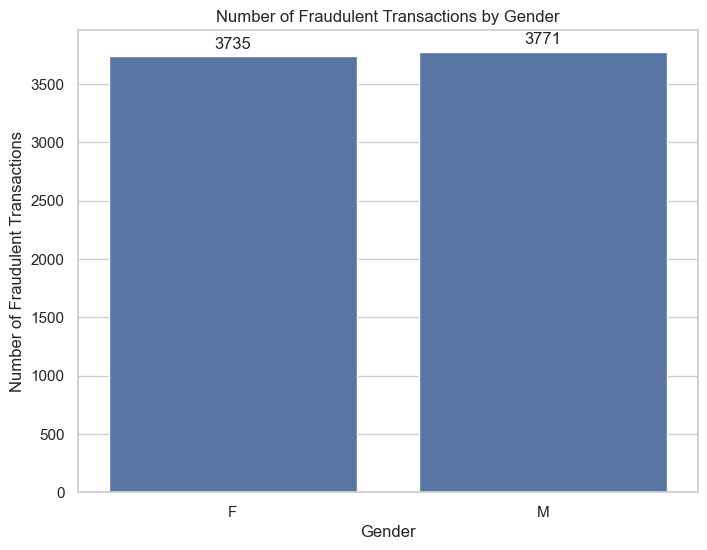

In [69]:
# Configurer Seaborn
sns.set(style="whitegrid")

# Compter les fraudes par genre
fraud_by_gender = df_train[df_train['is_fraud'] == 1].groupby('gender').size().reset_index(name='Count')

# Tracer les données
plt.figure(figsize=(8, 6))
barplot = sns.barplot(x='gender', y='Count', data=fraud_by_gender)

# Ajouter les annotations au-dessus de chaque barre
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.0f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha = 'center', va = 'center', 
                     xytext = (0, 9), 
                     textcoords = 'offset points')

# Titre et étiquettes
plt.title('Number of Fraudulent Transactions by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Fraudulent Transactions')
plt.show()

#### <span style="color:black;">Identification des Valeurs Aberrantes à l'Aide des Z-scores</span>


In [72]:
from scipy import stats
import numpy as np

# Calculer les Z-scores
z_scores = np.abs(stats.zscore(df_train[numerical_columns].dropna()))
outliers = (z_scores > 3).any(axis=1)

# Afficher les lignes contenant des valeurs aberrantes
outlier_data = df_train[outliers]
print(outlier_data)

         Unnamed: 0 trans_date_trans_time               cc_num  \
28               28   2019-01-01 00:22:06  4225990116481262579   
53               53   2019-01-01 00:39:43          60495593109   
105             105   2019-01-01 01:20:50      180040027502291   
138             138   2019-01-01 01:41:22     4060579726528237   
153             153   2019-01-01 01:49:37     3583635130604947   
...             ...                   ...                  ...   
1296510     1296510   2020-06-21 10:50:55     2576709887791552   
1296547     1296547   2020-06-21 11:07:51        4755696071492   
1296550     1296550   2020-06-21 11:10:20     3523898249167098   
1296573     1296573   2020-06-21 11:24:29  4255397449664185994   
1296600     1296600   2020-06-21 11:36:01     3576144910346950   

                                     merchant       category     amt    first  \
28                            fraud_Kunze Inc    grocery_pos   90.22    Brian   
53                          fraud_Volkman PLC

#### <span style="color:black;">Détection des Valeurs Aberrantes à l'Aide de l'IQR (Intervalle Interquartile)</span>


In [73]:
# Fonction pour détecter les valeurs aberrantes en utilisant l'IQR
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

# Identifier les valeurs aberrantes pour chaque variable numérique
for col in numerical_columns:
    outliers = detect_outliers_iqr(df_train, col)
    print(f'Valeurs aberrantes pour {col}:')
    print(outliers[[col]].head())


Valeurs aberrantes pour amt:
       amt
2   220.11
9   198.39
16  327.00
17  341.67
36  207.36
Valeurs aberrantes pour lat:
         lat
28   20.0827
236  64.7556
256  20.0827
433  20.0271
671  64.7556
Valeurs aberrantes pour long:
        long
13 -122.5258
28 -155.4880
30 -122.4810
47 -122.3456
65 -121.7913
Valeurs aberrantes pour city_pop:
    city_pop
9     151785
12    341043
19    124967
22     71485
24     95015
Valeurs aberrantes pour merch_lat:
     merch_lat
28   19.560013
236  65.023497
256  20.995398
433  19.209212
671  65.336985
Valeurs aberrantes pour merch_long:
     merch_long
13  -122.230347
28  -156.045889
47  -122.719904
109 -123.904978
130 -124.429537


#### <span style="color:black;">Boxplots des Variables Numériques pour Détection des Valeurs Aberrantes</span>


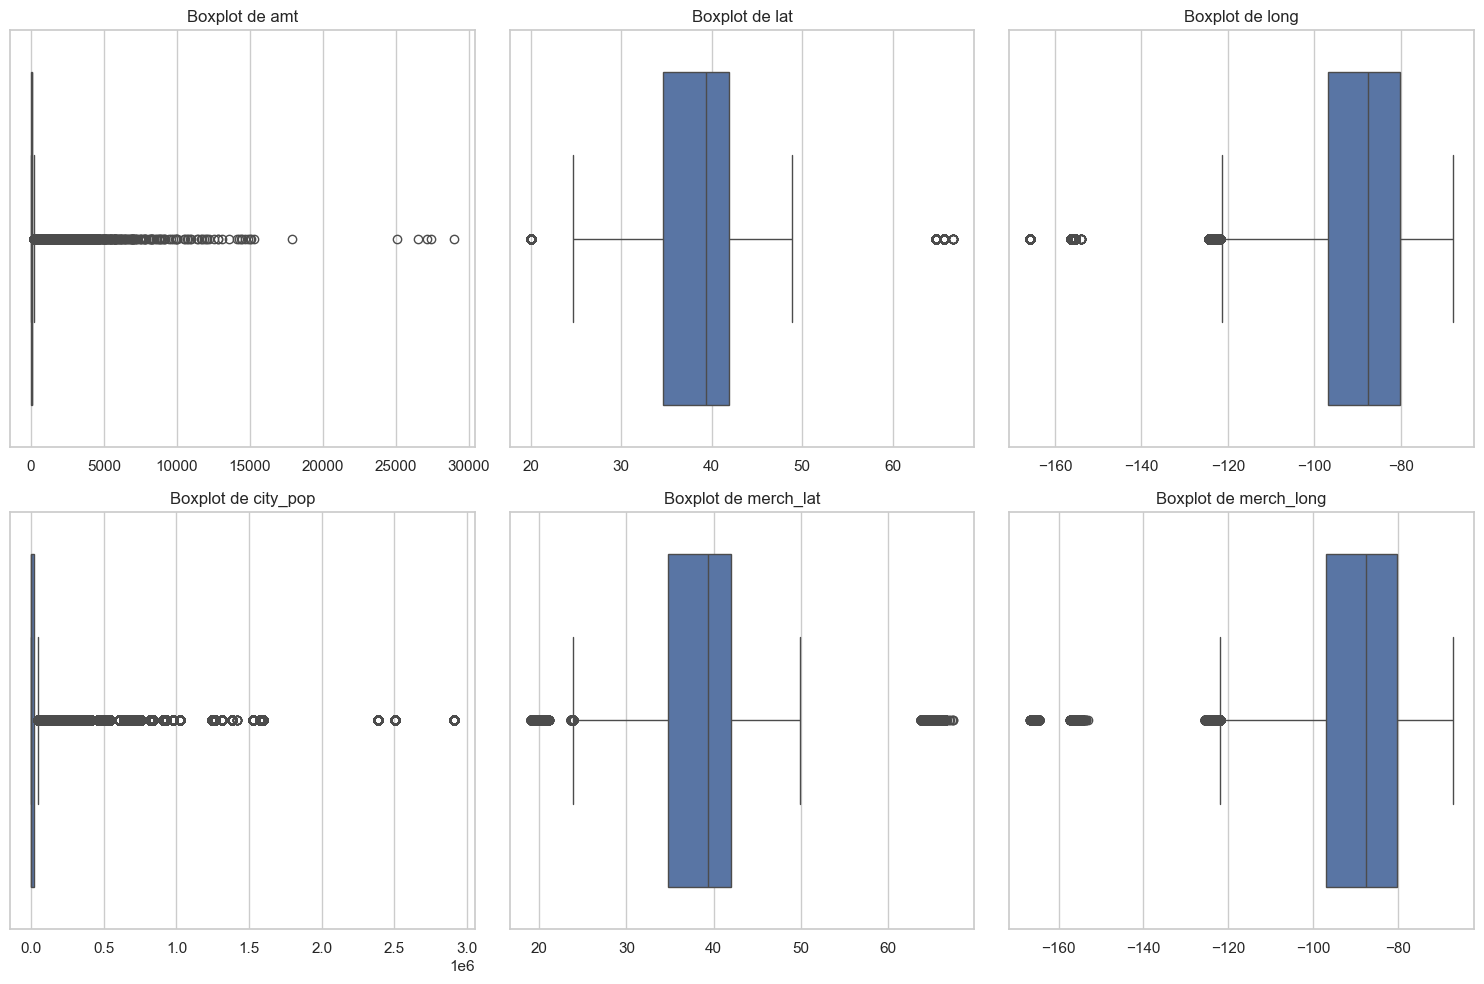

In [74]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=df_train[col])
    plt.title(f'Boxplot de {col}')
    plt.xlabel('')
plt.tight_layout()
plt.show()


#### <span style="color:black;">Histogrammes des Variables Numériques avec Valeurs Aberrantes Marquées</span>


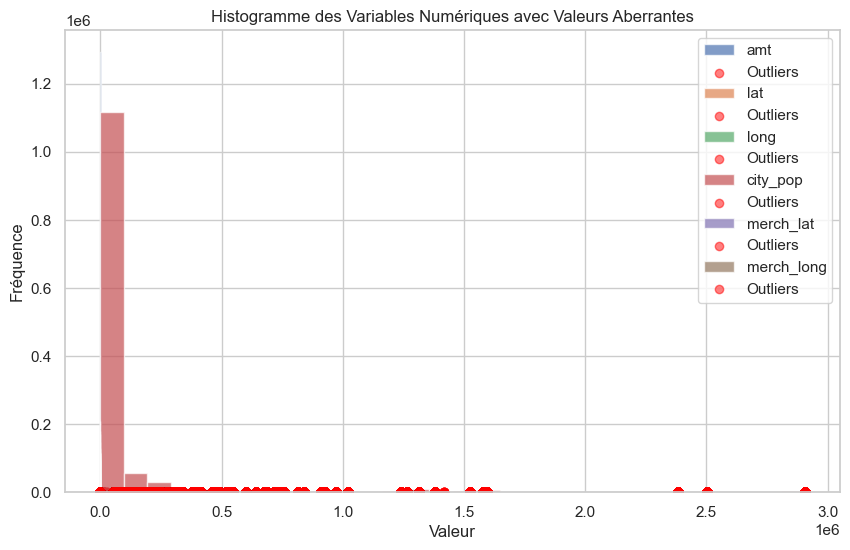

In [75]:
plt.figure(figsize=(10, 6))
for col in numerical_columns:
    plt.hist(df_train[col], bins=30, alpha=0.7, label=f'{col}')
    outliers = detect_outliers_iqr(df_train, col)
    plt.scatter(outliers[col], np.zeros_like(outliers[col]), color='red', label='Outliers', alpha=0.5)
plt.title('Histogramme des Variables Numériques avec Valeurs Aberrantes')
plt.xlabel('Valeur')
plt.ylabel('Fréquence')
plt.legend()
plt.show()


#### <span style="color:black;">Prétraitement des Données : Encodage des Dates et des Variables Catégoriques, Conversion des Types</span>


In [77]:

from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
encoder = LabelEncoder()
# Convertir les dates en timestamps
df_train['trans_date_trans_time'] = pd.to_datetime(df_train['trans_date_trans_time']).apply(lambda x: x.timestamp())
df_train['dob'] = pd.to_datetime(df_train['dob']).apply(lambda x: x.timestamp())

df_test['trans_date_trans_time'] = pd.to_datetime(df_test['trans_date_trans_time']).apply(lambda x: x.timestamp())
df_test['dob'] = pd.to_datetime(df_test['dob']).apply(lambda x: x.timestamp())

# Encodage des colonnes catégoriques
label_encoder = LabelEncoder()
columns_to_convert_in_string_to_int = ['category', 'city', 'state']

# Entraîner l'encodeur sur df_train et transformer df_train
for col in columns_to_convert_in_string_to_int:
    df_train[col] = label_encoder.fit_transform(df_train[col])
    
# Transformer df_test en utilisant les classes de df_train
for col in columns_to_convert_in_string_to_int:
    # Utiliser les mêmes classes que celles de df_train pour df_test
    df_test[col] = df_test[col].map(lambda x: label_encoder.transform([x])[0] if x in label_encoder.classes_ else -1)

# Convertir les colonnes en float
columns_to_convert_in_int_to_float = ['category', 'city', 'state', 'city_pop']
for col in columns_to_convert_in_int_to_float:
    df_train[col] = df_train[col].astype('float64')
    df_test[col] = df_test[col].astype('float64')

In [79]:
df_train.dtypes 

Unnamed: 0                 int64
trans_date_trans_time    float64
cc_num                     int64
merchant                  object
category                 float64
amt                      float64
first                     object
last                      object
gender                    object
street                    object
city                     float64
state                    float64
zip                        int64
lat                      float64
long                     float64
city_pop                 float64
job                       object
dob                      float64
trans_num                 object
unix_time                  int64
merch_lat                float64
merch_long               float64
is_fraud                   int64
hour                       int32
day_of_week                int32
is_weekend                 int64
day_period                object
trans_month               object
month                      int32
dtype: object